<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

KeyboardInterrupt: 

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
columns = ['Employment', 'JobSat', 'RemoteWork']
for col in columns:
    result = df[col].isnull().sum()  # Use col without quotes
    print(f'Missing values in {col}: {result}')

Missing values in Employment: 0
Missing values in JobSat: 36311
Missing values in RemoteWork: 10631


In [5]:
print(df['JobSat'].describe(),'\n'*2)
print(df['JobSat'].info(),'\n'*2)

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64 


<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: JobSat
Non-Null Count  Dtype  
--------------  -----  
29126 non-null  float64
dtypes: float64(1)
memory usage: 511.4 KB
None 




In [3]:
df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)

/tmp/ipykernel_6588/719361208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)


In [4]:
print(df['RemoteWork'].describe(),'\n'*2)
print(df['RemoteWork'].info(),'\n'*2)

count                                    54806
unique                                       3
top       Hybrid (some remote, some in-person)
freq                                     23015
Name: RemoteWork, dtype: object 


<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: RemoteWork
Non-Null Count  Dtype 
--------------  ----- 
54806 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB
None 




In [5]:
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


/tmp/ipykernel_6588/1060571414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


When dealing with NaN (missing) values in your dataset, you have several options depending on the context and the importance of the data. Here are some common strategies:

1. Remove Missing Values

If the number of missing values is small compared to the dataset, you can drop the rows with NaN values
```
df = df.dropna(subset=['JobSat'])
```
2. Impute Missing Values

Mean/Median Imputation: Replace NaN values with the mean or median of the column.
```
df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)  # For mean
# or
df['JobSat'].fillna(df['JobSat'].median(), inplace=True) # For median

Mode Imputation: If the data is categorical, you can use the mode.
df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)

```
3. Predictive Imputation
- Use machine learning models to predict and fill in missing values based on other features in the dataset.
4. Leave as NaN
- In some cases, it may be appropriate to leave NaN values as they are, especially if they carry meaning (e.g., "not applicable").
5. Create a New Category
- If the NaN values represent a distinct category, you can create a new category for them.
Considerations:

**Impact on Analysis:** Consider how each method will affect your analysis. For example, mean imputation can skew your data if the distribution is not normal.
Data Distribution: Check the distribution of your data before deciding on an imputation method.
Choose the method that best fits your analysis goals and the nature of your data.

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here
df['YearsCodePro'].describe()

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

In [7]:
# Convert Nan to 0 and 'Less than 1 year' to 0
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', int(0))
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', int(50))

In [8]:
# to integer
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

In [9]:
# Function to categorize experience level
def categorize_experience(years):
    if years == 0:
        return 'Beginner'
    elif 1 <= years <= 3:
        return 'Junior'
    elif 4 <= years <= 6:
        return 'Mid-level'
    elif 7 <= years <= 10:
        return 'Senior'
    else:
        return 'Expert'

# Create the new column 'ExperienceLevel' using the apply method
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)

# Print the updated DataFrame
print(df['ExperienceLevel'])

0         Beginner
1           Expert
2           Expert
3         Beginner
4         Beginner
           ...    
65432       Junior
65433     Beginner
65434    Mid-level
65435       Junior
65436     Beginner
Name: ExperienceLevel, Length: 65437, dtype: object


In [10]:
job_sat = df.loc[:, ['YearsCodePro', 'ExperienceLevel', 'JobSat']]

In [11]:
job_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsCodePro     65437 non-null  int64  
 1   ExperienceLevel  65437 non-null  object 
 2   JobSat           65437 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


In [12]:
job_sat.describe()

,YearsCodePro,JobSat
count,65437.000000,65437.000000
mean,8.031603,6.935041
std,9.092412,1.393186
min,0.000000,0.000000
25%,0.000000,6.935041
50%,5.000000,6.935041
75%,12.000000,7.000000
max,50.000000,10.000000


In [13]:
# Group by 'ExperienceLevel' and calculate the mean of 'JobSat'
average_job_sat = job_sat.groupby('ExperienceLevel')['JobSat'].mean()

# Display the result
print(average_job_sat)

ExperienceLevel
Beginner     6.900436
Expert       7.082150
Junior       6.789071
Mid-level    6.854409
Senior       6.958031
Name: JobSat, dtype: float64


In [14]:
average_job_sat = job_sat.groupby('ExperienceLevel')['JobSat'].mean().reset_index()

/tmp/ipykernel_6588/1974157808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceLevel', y='JobSat', data=average_job_sat, palette='viridis')  # Use the DataFrame directly


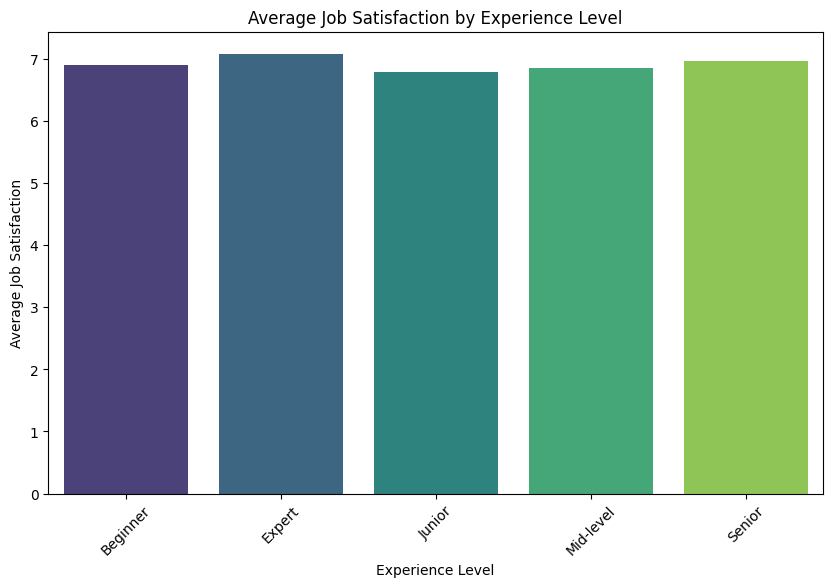

In [15]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='ExperienceLevel', y='JobSat', data=average_job_sat, palette='viridis')  # Use the DataFrame directly
plt.title('Average Job Satisfaction by Experience Level')  # Title of the plot
plt.xlabel('Experience Level')  # X-axis label
plt.ylabel('Average Job Satisfaction')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()  # Display the plot

**Notes**: It seems no difference in the job satisfaction among the different exerperience levels

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [16]:
df['JobSat'].value_counts()

JobSat
6.935041     36311
8.000000      7509
7.000000      6379
6.000000      3751
9.000000      3626
10.000000     2251
5.000000      1956
3.000000      1165
4.000000      1130
2.000000       772
0.000000       311
1.000000       276
Name: count, dtype: int64

In [17]:
# Sample data
data = {
    'JobSat': [6.935041, 8.0, 7.0, 6.0, 9.0, 10.0, 5.0, 3.0, 4.0, 2.0, 0.0, 1.0],
    'Count': [36311, 7509, 6379, 3751, 3626, 2251, 1956, 1165, 1130, 772, 311, 276]
}

# Create a DataFrame
job_sat = pd.DataFrame(data)

# Merge 6.935041 into 7.0
job_sat['JobSat'] = job_sat['JobSat'].replace(6.935041, 7.0)

# Recalculate the counts
merged_counts = job_sat.groupby('JobSat')['Count'].sum().reset_index()

# Display the updated distribution
print(merged_counts)

    JobSat  Count
0      0.0    311
1      1.0    276
2      2.0    772
3      3.0   1165
4      4.0   1130
5      5.0   1956
6      6.0   3751
7      7.0  42690
8      8.0   7509
9      9.0   3626
10    10.0   2251


/tmp/ipykernel_6588/1984385091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_counts, x='JobSat', y='Count', palette='viridis')  # Create the bar plot


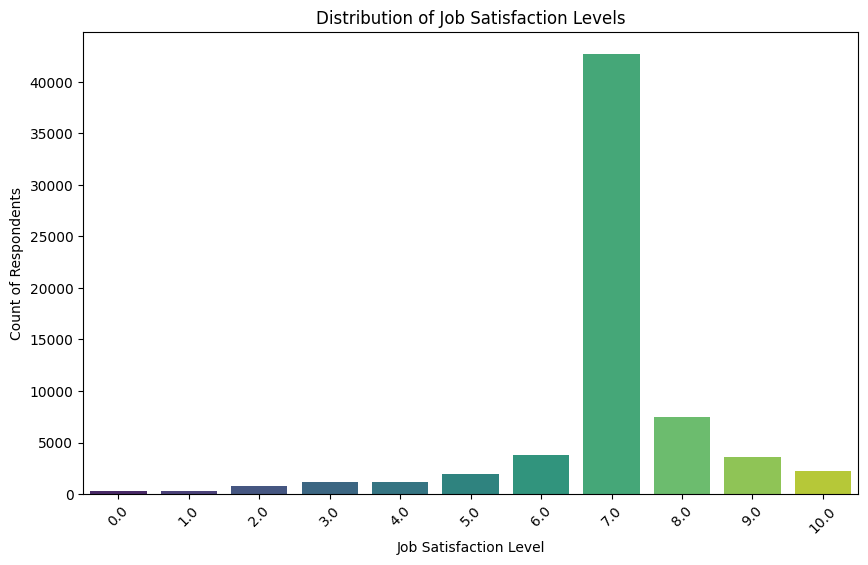

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=merged_counts, x='JobSat', y='Count', palette='viridis')  # Create the bar plot
plt.title('Distribution of Job Satisfaction Levels')  # Title of the plot
plt.xlabel('Job Satisfaction Level')  # X-axis label
plt.ylabel('Count of Respondents')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()  # Display the plot

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_6588/551308224.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Remote_Work, x='RemoteWork', y='Count', palette='viridis')  # Create the bar plot


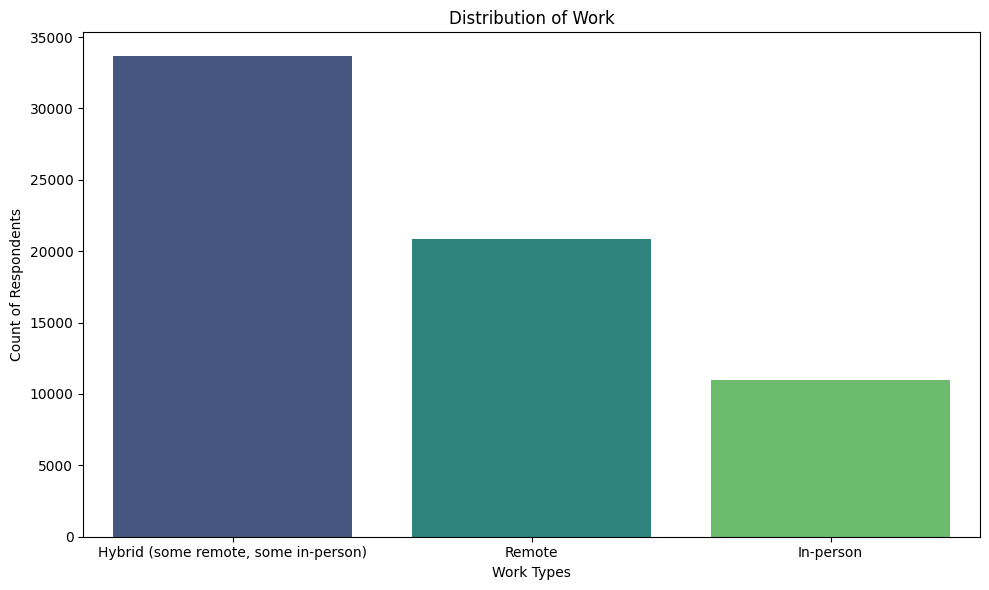

In [19]:
# Count the occurrences of each type of remote work
Work = df['RemoteWork'].value_counts()

# Create a DataFrame for the work counts
Remote_Work = pd.DataFrame(Work).reset_index()
Remote_Work.columns = ['RemoteWork', 'Count']  # Rename columns for clarity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=Remote_Work, x='RemoteWork', y='Count', palette='viridis')  # Create the bar plot
plt.title('Distribution of Work')  # Title of the plot
plt.xlabel('Work Types')  # X-axis label
plt.ylabel('Count of Respondents')  # Y-axis label
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()  # Display the plot

In [20]:
# Create a cross-tabulation
cross_tab = pd.crosstab(index=df['Employment'], columns=df['RemoteWork'], margins=True)

# Display the cross-tabulation
print(cross_tab)

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                                   494   
Student, part-time;Employed, part-time                                          

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [21]:
## Write your code here
filtered_countries=df.groupby('Country').sum().reset_index()
filtered_countries.head(10)

,Country,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel
0,Afghanistan,1868211,I am a developer by professionI am not primari...,35-44 years old25-34 years oldPrefer not to sa...,"Employed, full-timeEmployed, part-timeStudent,...","RemoteIn-personHybrid (some remote, some in-pe...",ApplesApplesApplesApplesApplesApplesApplesAppl...,I don’t code outside of workProfessional devel...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)...","School (i.e., University, College, etc)On the ...",Books;Stack Overflow;Coding sessions (live or ...,API document(s) and/or SDK document(s);User gu...,251010667Less than 1 year7832121072105More tha...,252,"Developer, desktop or enterprise applicationsP...",100 to 499 employeesJust me - I am a freelance...,I have little or no influenceI have little or ...,Ask developers I know/work withStart a free tr...,Out-of-the-box is ready to go with little need...,APIsAPIsAPIs;Customization;Reputation for qual...,BHD\tBahraini dinarAFN\tAfghan afghaniIRR\tIra...,1.000000e+53,C++AdaBash/Shell (all shells);Elixir;HTML/CSS;...,C++AdaBash/Shell (all shells);C;C++;Elixir;Erl...,C++AdaBash/Shell (all shells);Elixir;HTML/CSS;...,MySQLSQLiteMongoDB;MySQL;RedisMongoDB;PostgreS...,MySQLPostgreSQL;SQLiteMongoDB;PostgreSQLMongoD...,MySQLSQLiteMongoDBMongoDB;PostgreSQLMySQLBigQu...,Amazon Web Services (AWS)Microsoft AzurePython...,Amazon Web Services (AWS)Microsoft AzureHeroku...,Amazon Web Services (AWS)Microsoft AzurePython...,Flask;jQueryExpress;Node.js;ReactExpress;Next....,Django;Flask;jQuery;Phoenix;Spring Boot;WordPr...,Flask;jQueryExpress;Node.js;ReactNext.js;Node....,GNU GCCCMake;GNU GCC;LLVM's ClangArduino;Boost...,GNU GCCCMake;Cargo;GNU GCC;LLVM's Clang;Meson;...,GNU GCCCMake;GNU GCC;LLVM's ClangArduino;Boost...,CUDAFlutter;GTK;OpenGL.NET (5+) ;.NET Framewor...,CUDAFlutter;GTK;OpenGL.NET (5+) ;.NET Framewor...,CUDAFlutter;GTK;OpenGL.NET (5+) ;.NET Framewor...,MSBuildAPT;Make;Maven (build tool);Pacman;PipA...,MSBuildPacman;PipAPT;Docker;npm;ViteAPT;Bun;Do...,MSBuildPacman;PipAPT;Docker;npm;ViteAPT;Pip;pn...,Visual StudioNeovim;VimNotepad++;Visual Studio...,Visual StudioEmacs;IPython;Jupyter Notebook/Ju...,Visual StudioNeovim;VimNotepad++;Visual Studio...,WindowsOther (please specify

In [ ]:
# Sample the data to reduce the number of points
sampled_data = filtered_countries.sample(frac=0.1, random_state=1)  # Use 10% of the original data

# Create a pivot table for the heatmap
heatmap_data = sampled_data.pivot_table(index='Country', columns='LanguageHaveWorkedWith', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')  # Create the heatmap with annotations
plt.title('Heatmap of Programming Languages by Countries (Sample)')  # Title of the plot
plt.xlabel('Countries')  # X-axis label
plt.ylabel('Programing')  # Y-axis label
plt.show()  # Display the heatmap

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


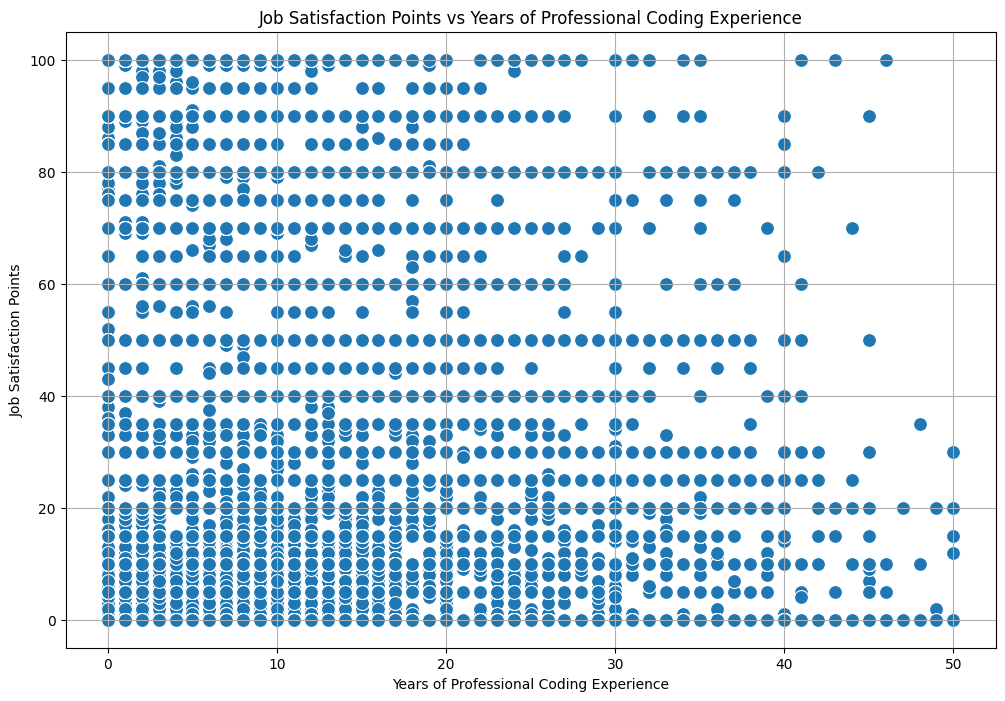

In [23]:
## Write your code here
Y_JS = df.loc[:, ['YearsCodePro', 'JobSatPoints_1']]

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.scatterplot(data=Y_JS, x='YearsCodePro', y='JobSatPoints_1', s=100)  # Create the scatter plot
plt.title('Job Satisfaction Points vs Years of Professional Coding Experience')  # Title of the plot
plt.xlabel('Years of Professional Coding Experience')  # X-axis label
plt.ylabel('Job Satisfaction Points')  # Y-axis label
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the scatter plot



**Comments:** It seems like no relationship.

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [ ]:
## Write your code here
Ed = df.loc['EdLevel

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
